# Assignment 5: Complex numbers and Fourier transform

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2

## Question 1: Complex exponent

Complex exponent is the complex version of the library function `exp`. 

1. Implement complex exponent using real-valued functions from the `numpy` library. Use Euler's formula for the exponent of a complex number.

In [59]:
def cexp(z):
    """computes the  exponent of a complex number or a numpy array of numbers.
    """
    return np.exp(z.real)*(np.cos(z.imag)+1j*np.sin(z.imag))

2. Using [Axes3d.plot_surface](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#surface-plots), plot the real and the imaginary parts of $\exp(z)$ for range $\mathcal{R}(z) \in [-2, 2]$, $\mathcal{I}(z) \in [0, 2\pi]$.

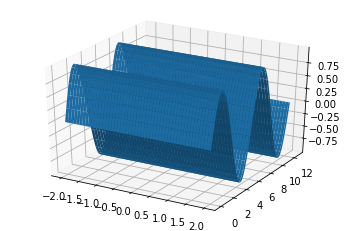

In [60]:
# example - with 3d sin wave
x = np.linspace(-2,2,100)
y = np.linspace(0, 4*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_1, y_1, np.sin(y_1))


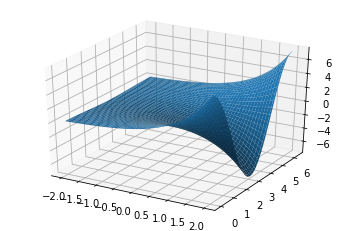

In [61]:
x = np.linspace(-2,2,100)
y = np.linspace(0, 2*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_1, y_1, cexp((x_1+y_1*1j)).real)

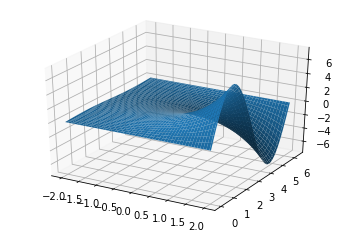

In [62]:
x = np.linspace(-2,2,100)
y = np.linspace(0, 2*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_1, y_1, cexp((x_1+y_1*1j)).imag)

3. Similarly, plot the magnitude and the phase of $\exp(z)$, for the same range.  
We define the magnitude and phase of $z=a+i\cdot b$:
\begin{align}
        magnitude(z) = \sqrt{a^2+b^2} \\ 
        phase(z) = \arctan({\frac{b}{a}})
    \end{align}
You can use [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and [np.angle](https://numpy.org/doc/stable/reference/generated/numpy.angle.html) to compute those.

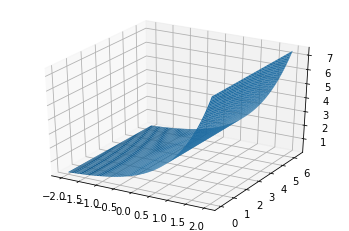

In [70]:
figure = plt.figure()
ax1 = figure.gca(projection='3d')
ax1.plot_surface(x_1, y_1, np.abs(cexp(x_1+y_1*1j)))

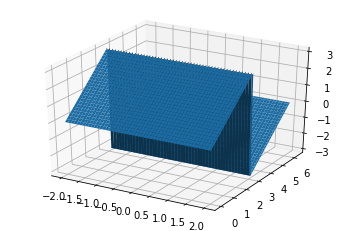

In [71]:
figure = plt.figure()
ax1 = figure.gca(projection='3d')
ax1.plot_surface(x_1, y_1, np.angle(cexp(x_1+y_1*1j)))

4. Find the maximum and minimum magnitude and phase of $exp(z - \overline z)$ ($\overline z$ is the conjugate of $z$), for the same range.

In [75]:
# z-z¯ is equal to (2 * the_im_part_of_z) , as the real part of z cancels out

def mag(x):
  return np.abs(cexp(x))

def phase(x):
  return np.angle(cexp(x))

maxMag = mag(2*y[0]*1j)
minMag = mag(2*y[0]*1j)
maxPhase = phase(2*y[0]*1j)
minPhase = phase(2*y[0]*1j)

for y_1 in y:
  curr_mag = mag(2*y_1*1j)
  curr_phase = phase(2*y_1*1j)
  if curr_mag > maxMag:
    maxMag= curr_mag
  elif curr_mag < minMag:
    minMag = curr_mag
  if curr_phase > maxPhase:
    maxPhase= curr_phase
  elif curr_phase<minPhase:
    minPhase = curr_phase

print(f"maximum Magnitude: {maxMag}  ||  minimum magnitude: {minMag}")
print(f"maximum Phase: {maxPhase}  ||  minimum Phase: {minPhase}")

maximum Magnitude: 1.0  ||  minimum magnitude: 0.9999999999999999
maximum Phase: 3.109859394462624  ||  minimum Phase: -3.1098593944626236


5. Find the maximum and minimum of the real and imaginary parts of $\exp(z\cdot \overline z)$, for the same range.

In [76]:
# z*z¯ is equal to abs(z)**2 , =(a**2 +b**2)
# as such, z*z¯ is always a real number, therefore we can conclude the min and max im(z*z¯)= 0 without computing

max = cexp(x[0]**2+y[0]**2).real
min = max

for x_1 in x:
  for y_1 in y:
    curr_real = cexp(x_1**2 + y_1**2).real
    if curr_real> max:
      max= curr_real
    elif curr_real <min:
      min= curr_real
print(f"the maximum real part is : {max}")
print(f"the minimum real part is : {min}")
print(f"maximum imaginary part of exp(z*z') is: {np.max(prod_exp.imag)}")
print(f"minimum imaginary part of exp(z*z') is: {np.min(prod_exp.imag)}")



the maximum real part is : 7.628459545359256e+18
the minimum real part is : 1.0004082049132021
maximum imaginary part of exp(z*z') is: 0.0
minimum imaginary part of exp(z*z') is: 0.0


## Question 2: Image processing with Fourier transform

After performing in 2022 student fest, the singer Lena-Lee tried to get back on stage for her encore. Unfortunately she got stuck behind a fence. 
In this exercise we will help Lena-Lee by moving the fence using the Fourier transform. 


*1*. Load and display the provided LenaLee.png

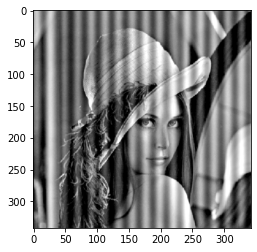

In [53]:
from scipy import fftpack
from scipy.fft import fft
from matplotlib.colors import LogNorm

img = cv2.imread('LenaLee.png',0) # Reads the original grayscale image
if img is None:
    raise Exception("Couldnt load image, make sure you uploaded it.")
plt.imshow(img,cmap='gray')


2. Compute the image’s DFT using the [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) function. Shift the zero-frequency component to the center of the spectrum using [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html). 
*Note* - The fftshift usually used for visualization. Now we can see also the negative frequencies components, and at the center of the image(image.width//2, image.height//2), we can find the zero-frequency component.

In [54]:
im_fft = np.fft.fft2(img)
image_centered=np.fft.fftshift(im_fft)


3. Display the amplitude spectrum of the image.
*Note* - The output of [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) is complex array, to get the amplitude we use np.abs.  
For visualization it is recommended to display $20 * \log(abs(output)+1)$ instead.   

In [55]:
def plot_spectrum(im_fft):
      # A logarithmic colormap
      plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
      plt.colorbar()

def plot_spectrum_visual(im_fft):
    plt.imshow(20*np.log(np.abs(im_fft)+1))
    plt.colorbar()

4. Filter out the signal which creates the bars of the fence.  
*Hint 1* - Are the bars have low frequency or high frequency?  
*Hint 2* - A signal is represented with two symmetric points in the spectrum.  
*Hint 3* - As one can see, the sinusoidal noise is horizontal. That means the vertical component of the noise function is zero, and the two points represnting the noise located at the middle row of the image.  

In [56]:
r, c = image_centered.shape
image_noise = image_centered.copy()

# in order to find the points i used the following code, iterating between ranges:
#
# image_centered[int(r/2),int(c/2-16):int(c/2 +17)] = 0
#
# after finding the range bounds where we get a clean picture we can deduce that 
# the two points we need to remove are c/2 -+ 16

image_centered[int(r/2),int(c/2-16)] = 0
image_centered[int(r/2),int(c/2+16)] = 0




# we will remove all of the other points in the noise matrix, besides our 2 found points

image_noise[:int(r/2),]=0
image_noise[int(r/2 +1):,]=0

#we have dealt with all the rows that are not r/2 , now we will deal with that row specifically

image_noise[int(r/2),:int(c/2-16)]=0
image_noise[int(r/2),int(c/2-15):int(c/2+16)]=0
image_noise[int(r/2),int(c/2+17):]=0



5. Apply the inverse DFT on the filtered Fourier spectrum using [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html) and [numpy.fft.ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html). Display the output(for displaying use the absolute value of the image). 

Text(0.5, 1.0, 'Noise')

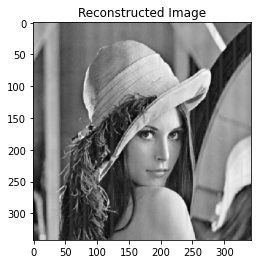

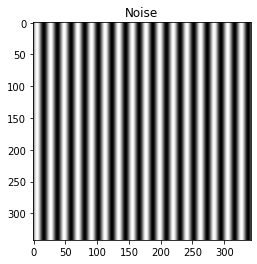

In [57]:
image_cleaned = fftpack.fftshift(image_centered)

image_cleaned = fftpack.ifft2(image_cleaned).real

# show the clean image
plt.figure()
plt.imshow(image_cleaned, plt.cm.gray)
plt.title('Reconstructed Image')


im_noise = fftpack.fftshift(image_noise)
im_noise = fftpack.ifft2(im_noise).real

plt.figure()
plt.imshow(im_noise, plt.cm.gray)
plt.title('Noise')